# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Automated Anomaly Detection using Z-score method

**Steps**:
1. Data Set: Download a dataset representing daily sales figures for a retail store.
2. Calculate Z-score: Compute the mean and standard deviation of the sales. Use these to
calculate the Z-score for each day's sales figure.
3. Identify Anomalies: Detect anomalies by identifying values with a Z-score above 3 or below -3.
4. Visualize: Plot a graph to visualize anomalies.

In [ ]:
# write your code from here

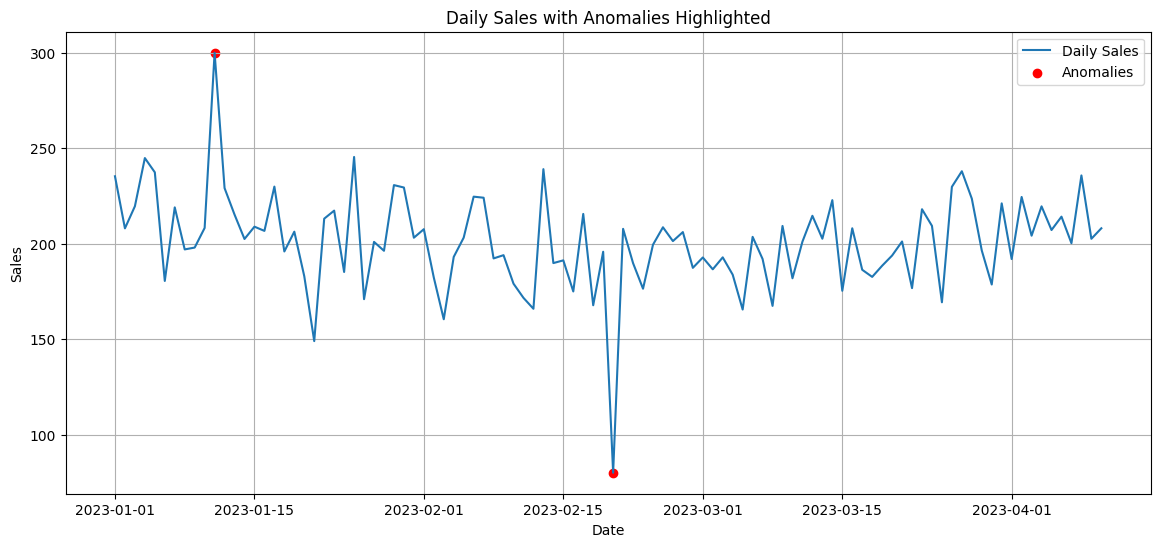

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate or Load dataset
# Simulated example; replace this with actual loading code if needed
np.random.seed(0)
days = pd.date_range(start="2023-01-01", periods=100)
sales = np.random.normal(loc=200, scale=20, size=100)
sales[10] = 300  # Anomaly
sales[50] = 80   # Anomaly

df = pd.DataFrame({'Date': days, 'Sales': sales})

# Step 2: Error handling and validation
try:
    assert 'Sales' in df.columns, "Error: 'Sales' column missing"
    assert df['Sales'].dtype == np.float64 or df['Sales'].dtype == np.float32 or np.issubdtype(df['Sales'].dtype, np.number), \
        "Error: 'Sales' column must be numeric"
    assert df['Sales'].notna().all(), "Error: 'Sales' column contains NaN values"
    assert df['Sales'].size > 0, "Error: 'Sales' column is empty"
    
    # Step 3: Z-score calculation
    mean_sales = df['Sales'].mean()
    std_sales = df['Sales'].std()
    df['Z_score'] = (df['Sales'] - mean_sales) / std_sales

    # Step 4: Identify anomalies
    df['Anomaly'] = (df['Z_score'] > 3) | (df['Z_score'] < -3)

    # Step 5: Visualization
    plt.figure(figsize=(14, 6))
    plt.plot(df['Date'], df['Sales'], label='Daily Sales')
    plt.scatter(df[df['Anomaly']]['Date'], df[df['Anomaly']]['Sales'], color='red', label='Anomalies')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('Daily Sales with Anomalies Highlighted')
    plt.legend()
    plt.grid(True)
    plt.show()

except AssertionError as e:
    print(e)
except Exception as e:
    print("Unexpected error:", e)
